In [4]:
from pydantic import BaseModel
from langgraph.graph import StateGraph, END

In [ ]:
class AgentState(BaseModel):
    ...
def plan_step():...
def act_step():...
def reflect_step():...
def retry_step():...
def should_react():
    return "retry" if True else "end"

In [7]:

graph_builder = StateGraph(AgentState)

graph_builder.add_node("plan", plan_step)
graph_builder.add_node("act", act_step)
graph_builder.add_node("reflect", reflect_step)
graph_builder.add_node("retry", retry_step)

graph_builder.set_entry_point("plan")
graph_builder.add_edge("plan", "act")
graph_builder.add_edge("act", "reflect")

graph_builder.add_conditional_edges("reflect", should_react, {
    "end": END,
    "retry": "retry"
})

graph_builder.add_edge("retry", "reflect")

graph = graph_builder.compile()

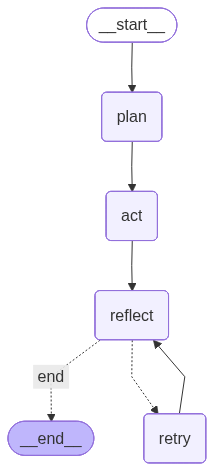

In [8]:
graph